# Data Wrangling Template

## Gather

### Importation des librairies de base

In [1]:
#Importation des bibliotheques
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Importation des datasets

1. Importation du fichier les archives Twitter de WeRateDogs

In [2]:
data_archive = pd.read_csv('twitter-archive-enhanced.csv')
data_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Importation des prédictions de l’image tweet en ligne 

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Enregistrer le html dans un fichier
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
data_predict = pd.read_csv('image-predictions.tsv', sep='\t')
data_predict.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,French_bulldog,0.317617,True,bull_mastiff,0.093928,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True


3. Importation de l'API twitter via le fichier json

lien: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [5]:
with open('tweet_json.txt') as json_file:
    data_api = pd.DataFrame((json.loads(line) for line in json_file), columns = ['id', 'retweet_count', 'favourites_count'])

data_api.head()  

,id,retweet_count,favourites_count
0,892420643555336193,8853,NaN
1,892177421306343426,6514,NaN
2,891815181378084864,4328,NaN
3,891689557279858688,8964,NaN
4,891327558926688256,9774,NaN


## Assess

# Evaluation des données 


### Evaluation du fichier les archives Twitter de WeRateDogs: data_archive

1. Evaluation visuelle
    <b>Problèmes de qualité</b>
    - Valeurs manquantes
    - La variable "source" contient du code html
    - Certains chiens n'ont pas de classe
    - Certains chiens ont plusieurs classes
    - Les valeurs manquantes ont ete remplacees par "None" qui est pas reconnu par python
    
   <b>Problèmes d’ordre</b>
   - Les variables "in_reply_to_status_id" sont de trop

   
2. Evaluation programmatique

In [6]:
data_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

 - La variable "timestamp" est de type chaîne de caractère 

In [7]:
data_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- Certaines observations n'ont pas de noms tandis que d'autres ont des noms qui ne sont pas logiquement ceux d'un chien

### Evaluation du fichier des prédictions de l’image tweet: data_predict

1. Evaluation visuelle

    <b>Problèmes de qualité</b>
    - Valeurs manquantes
    - Les noms des colonnes ne sont pas significatifs
    
    <b>Problèmes d'ordre</b>
    - Quatre colonnes pour la classification des chiens 
   
2. Evaluation programmatique


In [8]:
#Evaluons les donnees du dataset 1
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- La taille de l'ensemble de données est différente de celle du premier dataset

In [9]:
sum(data_predict['jpg_url'].duplicated())

66

- 66 valeurs dupliquées 

In [10]:
data_predict['p1'].value_counts() 

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

<p> - Certains noms ne sont pas des noms de chiens comme 'a' par exemple </p>

### Evaluation du fichier api tweet: data_api

1. Evaluation visuelle

    <b>Problemes de qualites</b>
    - valeurs manquantes
   
2. Evaluation programmatique

In [11]:
data_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2354 non-null   int64  
 1   retweet_count     2354 non-null   int64  
 2   favourites_count  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 55.3 KB


- La taille est différente des autres datasets
- La variable "id" est nommée différemment.


Nous avons évalué les différents datasets et les problèmes de qualité suivant ont ete repertories
     <h2> Problemes de Qualite </h2>
     
     1. Valeurs manquantes
     2. Certains noms de colonnes ne sont pas significatifs
     3. L'existence des valeurs dupliquées
     4. certains chiens sont multiclasses
     5. une colonne contient du code html
     6. Certains chiens n'ont pas de classes
     7. Certains variables ont un mauvais type
     8. Certains noms ne sont pas des noms de chiens

     

En outre, nous avons observé quelques problèmes d'ordre tels que:
     <h2> Problèmes d'ordre </h2>
    
    1.Les trois datasets peuvent être assemblés suivant l'attribut tweet_id
    2.Certaines colonnes n'ont pas une importance capitale 


## Clean

# Nettoyage des donnees

## 1. Concatenation des trois datasets

#### Definition 1

<em>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html</em>

- Renommons tout d'abord la variable "id" de data_api en "tweet_id" conformement aux deux autres datasets
- Utulisons la fonction "merge" pour assembler les ensembles archive, prediction et api

#### Code1

In [12]:
#Renomons les colonnes de data_api
data_api.columns = ['tweet_id', 'retweets', 'favorites']

data = data_api.copy()



#Assembler les trois datasets suivant l'attribut tweet_id
data = pd.merge(data_archive, data_predict, how='outer', on='tweet_id')






In [13]:
data1 = data.copy()

#### Test 1


In [14]:
data_api.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,NaN
1,892177421306343426,6514,NaN
2,891815181378084864,4328,NaN
3,891689557279858688,8964,NaN
4,891327558926688256,9774,NaN


In [15]:
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## 2. Unifions les valeurs manquantes 

#### Definition 2

Remplaçons toutes les valeurs None par NaN

#### Code 2

In [16]:
data.replace('None', np.nan, inplace=True)


#### Test 2

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

## 3. Suppresion des colonnes

#### Definition3

 Supprimons les colonnes de trop qui ne sont pas neccessaires dans le dataset : in_reply_to_status_id	in_reply_to_user_id

#### Code3

In [18]:
#Dimenssions initiales du dataset
data.shape

(2356, 28)

In [19]:
#Listons toutes les colonnes
data.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
#Suppression des colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp
data.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
         axis = 1, inplace = True)

#### Test3

In [21]:
#Verifier l'en-tete du dataset
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [22]:
#Verifions a nouveau les dimensions du dataset
data.shape

(2356, 23)

## 4. Renomons les colonnes de prediction pas significatives

#### Definition4

Renommons les colonnes de prédiction pas significatives

#### Code4

In [23]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
data = data.rename(columns ={'p1': 'first_prediction', 'p1_conf':'first_prediction_confience', 'p1_dog' : 'first_prediction_isdog',
                            'p2': 'second_prediction', 'p2_conf':'second_prediction_confience', 'p2_dog' : 'second_prediction_isdog',
                            'p3': 'third_prediction', 'p3_conf':'third_prediction_confience', 'p3_dog' : 'third_prediction_isdog',})

##### Test4

In [25]:
#Verifions l'effectivite
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,first_prediction,first_prediction_confience,first_prediction_isdog,second_prediction,second_prediction_confience,second_prediction_isdog,third_prediction,third_prediction_confience,third_prediction_isdog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## 5. Suppression des valeurs d'images dupliquées

#### Definition5

Identifions et supprimons l'ensemble des images dupliquées


#### Code5

In [26]:
#Somme des valeurs duplicaquees
sum(data['jpg_url'].duplicated())

346

In [27]:
#suppression
data = data.drop_duplicates(subset = ['jpg_url'], keep = 'last')

#### Test5

In [28]:
sum(data['jpg_url'].duplicated())

0

## 6. Classification des chiens

#### Definition6

Regroupons toutes les classes de chiens dans une seule colonne et supprimons les quatres autres colonnes car plusieurs chiens n'ont pas de classe

#### Code6

In [29]:
noclass= data.query("doggo =='None' & floofer =='None' & pupper == 'None' & puppo=='None' ")
noclass


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,first_prediction,first_prediction_confience,first_prediction_isdog,second_prediction,second_prediction_confience,second_prediction_isdog,third_prediction,third_prediction_confience,third_prediction_isdog


In [30]:
#Parcourrir le dataframe
for index, column in data.iterrows():
    for word in ['pupper', 'doggo', 'floofer', 'puppo']:
        if word.lower() in str(data.loc[index,'text']).lower():
            data.loc[index, 'classes'] = word.title()
        

In [31]:
data.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

#### Test6

In [32]:
data.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction,first_prediction_confience,first_prediction_isdog,second_prediction,second_prediction_confience,second_prediction_isdog,third_prediction,third_prediction_confience,third_prediction_isdog,classes
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
1346,704480331685040129,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1.0,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False,NaN
1933,674019345211760640,2015-12-08 00:15:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1.0,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True,NaN


## 7. Les chiens n'ayant pas de classes

#### Definition7

Remplaçons les valeurs manquantes de la variable classes par le mot 'inconnu'


#### Code7

In [33]:
#Somme des valeurs manquantes
data['classes'].isnull().sum()

1664

In [34]:
data['classes'].fillna(value = 'inconnu' , inplace=True)

In [35]:
data.dropna(inplace = True)

#### Test7

In [36]:
data.isnull().sum()

tweet_id                       0
timestamp                      0
source                         0
text                           0
expanded_urls                  0
rating_numerator               0
rating_denominator             0
name                           0
jpg_url                        0
img_num                        0
first_prediction               0
first_prediction_confience     0
first_prediction_isdog         0
second_prediction              0
second_prediction_confience    0
second_prediction_isdog        0
third_prediction               0
third_prediction_confience     0
third_prediction_isdog         0
classes                        0
dtype: int64

## 8. Variable timestamp a un mauvais type

#### Definition8
Renommons timestamp en date_tweet et convertisons son type en data_time

#### Code8

In [37]:

data.rename(columns={'timestamp':"date_tweet"}, inplace=True)
data['date_tweet'] = pd.to_datetime(data["date_tweet"])

#### Test8

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 2354
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   tweet_id                     1448 non-null   int64              
 1   date_tweet                   1448 non-null   datetime64[ns, UTC]
 2   source                       1448 non-null   object             
 3   text                         1448 non-null   object             
 4   expanded_urls                1448 non-null   object             
 5   rating_numerator             1448 non-null   int64              
 6   rating_denominator           1448 non-null   int64              
 7   name                         1448 non-null   object             
 8   jpg_url                      1448 non-null   object             
 9   img_num                      1448 non-null   float64            
 10  first_prediction             1448 non-null   obj

## 9. Code html dans la variable source

#### Definition9
Renommons les valeurs de liens par TwitteriPhone, TwitterWeb, TwitterVine et twitterDesk

#### Code9

In [39]:
data['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','TwitteriPhone', inplace=True)
data['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','TwitterWeb', inplace=True)
data['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','TwitterVine', inplace=True)
data['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Twitterdesk', inplace=True)


#### Test9

In [40]:
data.head()

,tweet_id,date_tweet,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction,first_prediction_confience,first_prediction_isdog,second_prediction,second_prediction_confience,second_prediction_isdog,third_prediction,third_prediction_confience,third_prediction_isdog,classes
0,892420643555336193,2017-08-01 16:23:56+00:00,TwitteriPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,inconnu
1,892177421306343426,2017-08-01 00:17:27+00:00,TwitteriPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,inconnu
2,891815181378084864,2017-07-31 00:18:03+00:00,TwitteriPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,inconnu
3,891689557279858688,2017-07-30 15:58:51+00:00,TwitteriPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,inconnu
4,891327558926688256,2017-07-29 16:00:24+00:00,TwitteriPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,inconnu


## 10.  Noms de chiens erronés 

#### Definition10
Convertissons les noms de chien erronés en NaN

#### Code10

In [41]:
data['name'].value_counts()

a             55
Charlie       11
Lucy          10
Cooper        10
Oliver        10
              ..
Bookstore      1
Shiloh         1
Burt           1
Gustav         1
Christoper     1
Name: name, Length: 935, dtype: int64

In [42]:
data['name'] = data['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [43]:
data[data.name.str.lower() == data.name].name.unique()

array([], dtype=object)

#### Test10

In [44]:
data['name'].value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Leela          1
Glenn          1
Shelby         1
Sephie         1
Christoper     1
Name: name, Length: 913, dtype: int64

## Sauvegarde du dataset

In [45]:
data.to_csv('twitter_archive_master.csv', index=False)

# Observations et visualisation

## Quels sont les noms de chiens les plus populaires?

In [46]:
data['name'].value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Leela          1
Glenn          1
Shelby         1
Sephie         1
Christoper     1
Name: name, Length: 913, dtype: int64

<b>Nous observons que les noms <em>Charlie</em>, <em>Cooper</em>, <em>Lucy</em> et <em>Oliver</em> sont les plus populaires</b>

### Visualisation

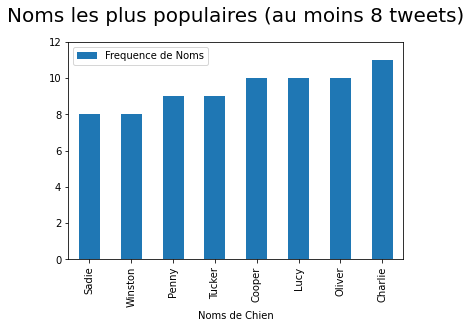

In [47]:
noms_chien = data.query('name == name')
noms_chien_group = noms_chien.groupby('name').count()[['tweet_id']]
noms=noms_chien_group.query('tweet_id >= 8').sort_values(by=['tweet_id']).plot.bar()
plt.ylim(top=12)
plt.title("Noms les plus populaires (au moins 8 tweets)",{'fontsize': 20},pad=20)
plt.xlabel("Noms de Chien")
plt.legend(["Frequence de Noms"])


## Quelle est la source de tweet la plus courante?

In [48]:
sources = data.groupby('source').count()[['tweet_id']]
#tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
pourcentage_tweet = round(sources /sources.sum() * 100)
print(pourcentage_tweet)


               tweet_id
source                 
TwitterWeb          1.0
Twitterdesk         1.0
TwitteriPhone      98.0


<b>Nous observons que <em>98%</em> de tweets sont effectues a partir d'un iPhone</b>

## Quelle est la classe du chien le plus populaire?

In [49]:
noms = data.query("name == 'Charlie'")
noms

,tweet_id,date_tweet,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction,first_prediction_confience,first_prediction_isdog,second_prediction,second_prediction_confience,second_prediction_isdog,third_prediction,third_prediction_confience,third_prediction_isdog,classes
254,844580511645339650,2017-03-22 16:04:20+00:00,TwitteriPhone,This is Charlie. He wants to know if you have ...,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1.0,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False,inconnu
261,842846295480000512,2017-03-17 21:13:10+00:00,TwitteriPhone,This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1.0,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True,inconnu
326,833826103416520705,2017-02-20 23:50:09+00:00,TwitteriPhone,Meet Charlie. She asked u to change the channe...,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1.0,Chihuahua,0.438054,True,kelpie,0.149706,True,Pembroke,0.096480,True,inconnu
338,832369877331693569,2017-02-16 23:23:38+00:00,TwitteriPhone,This is Charlie. He fell asleep on a heating v...,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1.0,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True,inconnu
383,827199976799354881,2017-02-02 17:00:17+00:00,TwitteriPhone,This is Charlie. He wins every game of chess h...,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4.0,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True,inconnu
813,771102124360998913,2016-08-31 21:47:27+00:00,TwitteriPhone,This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,1.0,Labrador_retriever,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True,inconnu
932,754011816964026368,2016-07-15 17:56:40+00:00,TwitteriPhone,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1.0,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True,inconnu
1358,703382836347330562,2016-02-27 00:55:11+00:00,TwitteriPhone,This is Charlie. He's a West Side Niddlewog. M...,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2.0,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True,inconnu
1436,697255105972801536,2016-02-10 03:05:46+00:00,TwitteriPhone,Meet Charlie. He likes to kiss all the big mil...,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1.0,Great_Dane,0.173989,True,malinois,0.165888,True,Doberman,0.119890,True,inconnu
1682,681891461017812993,2015-12-29 17:36:07+00:00,TwitteriPhone,Say hello to Charlie. He's scholarly af. Quite...,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,1.0,Chihuahua,0.203570,True,doormat,0.134316,False,toy_terrier,0.084482,True,Pupper


<b>Nous observons que le chien le plus populaire appartient a la classe <em>Pupper</em></b>